#### importing the relevant packages and loading the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv("data/dengue_features_train.csv")
y = pd.read_csv("data/dengue_labels_train.csv")

#### Exploring the data

In [2]:
X.shape

(1456, 24)

>We have a total of 1456 rows of data, each row represents climate data for a week for a particular city

In [3]:
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
y.shape

(1456, 4)

> We have been given the number of total cases of Dengue reported in a particular week for the given city, our model needs to predict this for the upcoming weeks

In [5]:
y.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


**Exploring the distribution of our y values**

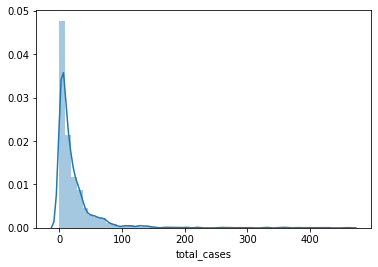

In [6]:
sns.distplot(y.total_cases)

plt.show()

> the number of total cases of Dengue per Week have a median value of around 25, this distribution is highly skewed

In [7]:
y.total_cases.mean()

24.67513736263736

In [8]:
y.total_cases.std()

43.5960001631074

In [9]:
y.total_cases.median()

12.0

In [10]:
y.total_cases.mad()

23.003354818258018

#### Explore the possibility of an yearly pattern in the disease

In [11]:
def yearly_pattern(city, year, ylim = (0,200)):
    df = y[y['city'] == city][y['year'] == year]
    df.plot.bar('weekofyear', 'total_cases', legend=False, ylim = ylim)

> Since we have to model the number of total cases based on the climate data, it shall be useful to see if this disease has an annual pattern, in case it does, it shall suggest a strong correlation between climate and total cases!

We shall examine these patterns seperately for the two given cities!

#### San Juan

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


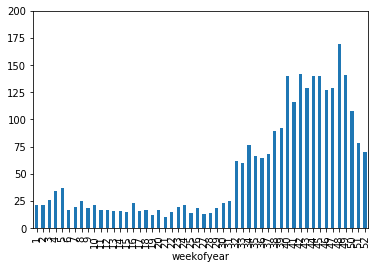

In [12]:
yearly_pattern('sj', 1991)

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


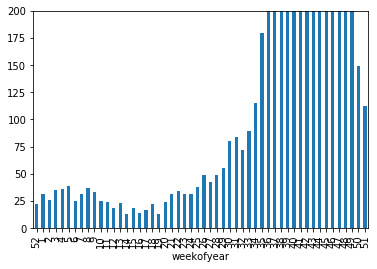

In [13]:
yearly_pattern('sj', 1994)

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


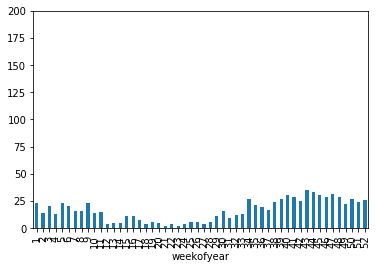

In [14]:
yearly_pattern('sj', 1996)

#### Conclusion for San Juan
 - The number of cases per week peak seems to peak in the final quarter of the year. (In most cases)
 - this indicates the possibility of some correlation between the climate and Dengue spread

#### Iquitos

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


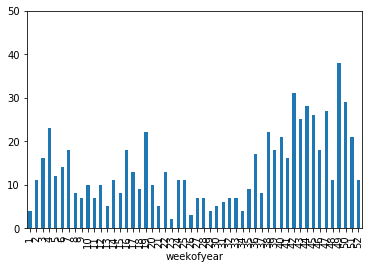

In [15]:
yearly_pattern('iq', 2002, (0,50))

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


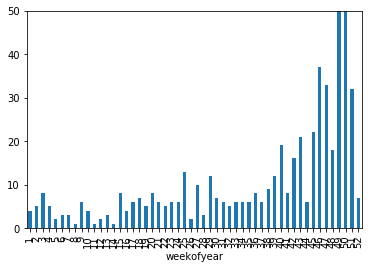

In [16]:
yearly_pattern('iq', 2004, (0,50))

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


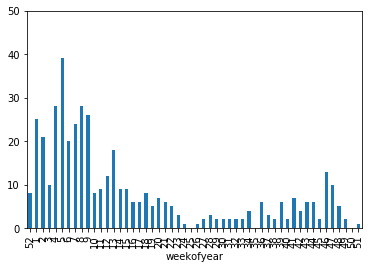

In [17]:
yearly_pattern('iq', 2006, (0,50))

C:\Users\Towhid Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


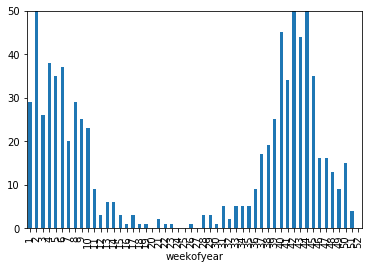

In [18]:
yearly_pattern('iq', 2008, (0,50))

#### Conclusion for Iquitos
 - For the city of Iquitos, there is no strong annual pattern in the number of dengue cases per week
 - There still is some possibility of a correlation between the city's climate and the disease, if we find that even the climate doesn't show a strict annual pattern

> With the exploratory analysis done, let us move on to modelling this data for our problem!